In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import files
fil = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


**sd = Salary_Data over here**

In [8]:
sd = pd.read_csv("Salary_Data.csv")
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Execusion of EDA

In [9]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
sd.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
sd[sd.duplicated()]

,YearsExperience,Salary


In [12]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# ***Visualization***

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'YearsExperience')

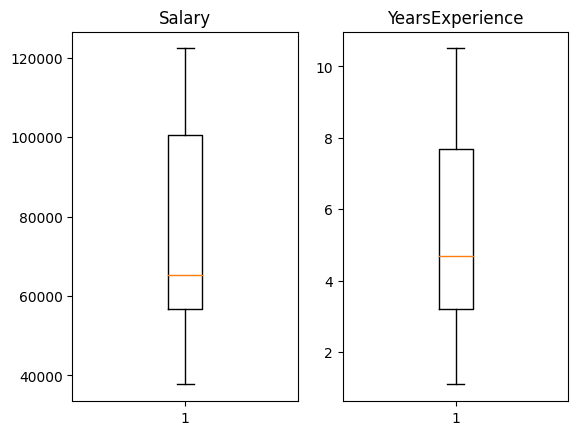

In [14]:
plt.subplot(121)
plt.boxplot(sd['Salary'])
plt.title('Salary')
plt.subplot(122)
plt.boxplot(sd['YearsExperience'])
plt.title('YearsExperience')

**Corelation check**

In [15]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [16]:
sd.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

<Axes: xlabel='Salary', ylabel='YearsExperience'>

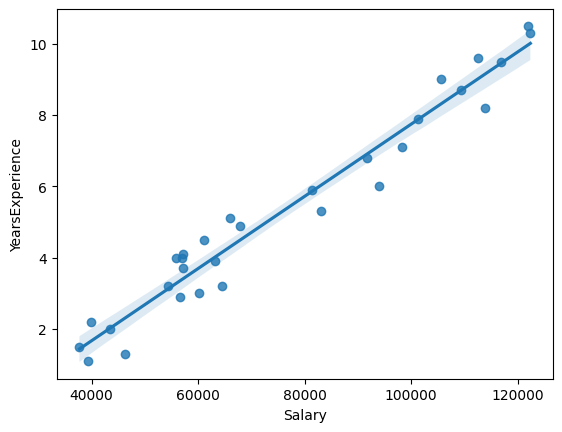

In [17]:
sns.regplot(x=sd['Salary'],y=sd['YearsExperience'])

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

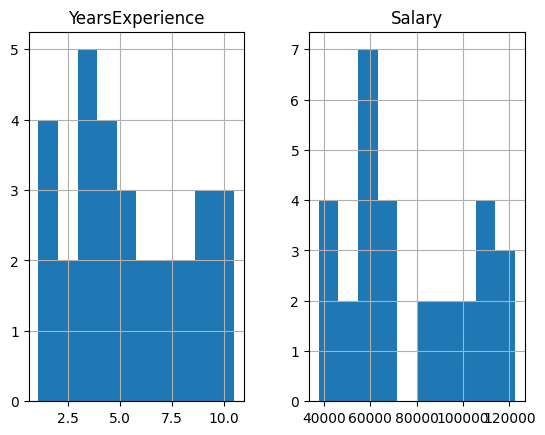

In [18]:
sd.hist()

**Checking for Homoscedasticity or Hetroscedasticity**

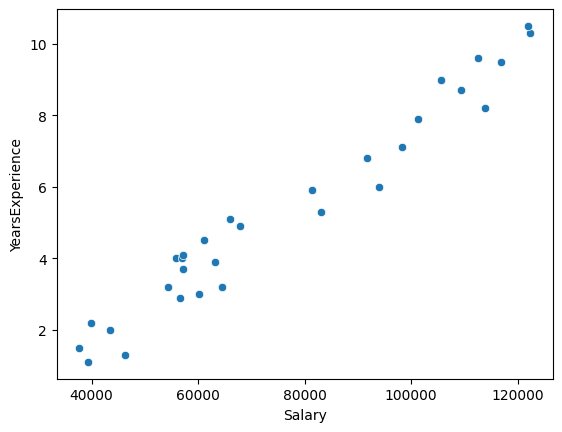

In [19]:
sns.scatterplot(x=sd['Salary'],y=sd['YearsExperience'])
plt.show()

* We can get YearsExperience Increases Salary also increases.
* But, it's also nor Homoscedastic too.

Text(0.5, 1.0, 'Log transformation')

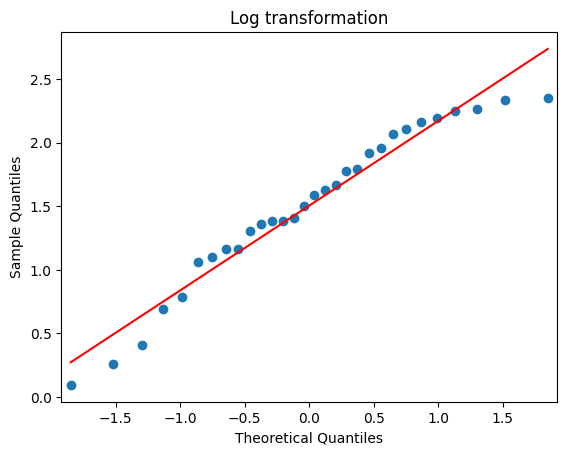

In [21]:
import statsmodels.api as smf
smf.qqplot(np.log(sd['YearsExperience']), line = 'r')
plt.title('Log transformation')

As log transformation affect the data we included log values

In [22]:
sd['YearsExperience log'] = np.log2(sd['YearsExperience'])

# Implementing Linear Regression Model

Using OLS

In [23]:
sd1 = sd.rename({'Salary':'Salary','YearsExperience log':'YearsExperience_log'}, axis = 1)
sd1.sample()

,YearsExperience,Salary,YearsExperience_log
6,3.0,60150.0,1.584963


In [24]:
import statsmodels.formula.api as smf

In [25]:
model = smf.ols('Salary~YearsExperience_log',data=sd1).fit()
model.params

Intercept              14927.971770
YearsExperience_log    28129.290536
dtype: float64

In [26]:
test = sd1.sample(1)

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           3.25e-13
Time:                        15:53:03   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
YearsExperience_log  2.813e+04   2198.977     12.792      0.000    2.36e+04    3.26e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared,Adj-Squared are above 0.8

In [28]:
model.predict(test)

7    62130.943929
dtype: float64